In [1]:
%matplotlib inline

from pathlib import Path

import tifffile
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import mask_lib as mlib

model_location = "hadim/mask_rcnn_tf_model_in_vitro_microtubule"

model_name = "microtubule_coco_512"
saved_model_dir = Path("/home/hadim/.data/Neural_Network/Mask-RCNN/Microtubules/saved_model")
#model_location = str(saved_model_dir / f"tf_model_{model_name}.zip")

Using TensorFlow backend.


# Load an image

(117, 237)

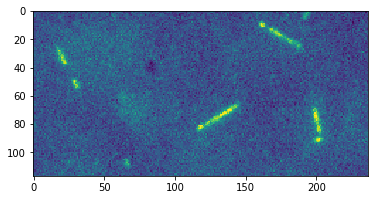

In [2]:
image_dir = Path("/home/hadim/Documents/Code/Postdoc/ij/testdata/")
image_path = image_dir / "fake-flat-corrected.tif"
image_path = image_dir / "7,5uM_emccd_lapse1-small-8bit-Single.tif"
#image_path = image_dir / "test-tracking-single.tif"
#image_path = image_dir / "test-tracking.tif"

original_images = tifffile.imread(str(image_path))
if len(original_images.shape) == 2:
    original_images = np.expand_dims(original_images, 0)

original_image = original_images[0]
plt.imshow(original_image)
original_image.shape

# Predict

In [3]:
results = mlib.inference(original_image, model_location)

hadim/mask_rcnn_tf_model_in_vitro_microtubule already installed.


In [4]:
results["rois"]

array([[ 64, 114,  87, 148],
       [ 46,  26,  57,  35],
       [ 23,  14,  40,  26],
       [  8, 160,  28, 192],
       [104,  63, 115,  70],
       [  0, 189,   8, 197],
       [ 67, 196,  92, 205],
       [104,  42, 112,  49],
       [  6, 158,  14, 166]], dtype=int32)

# Display result of detection

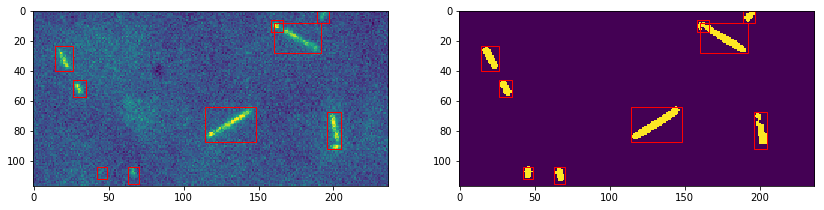

In [5]:
from matplotlib.patches import Rectangle

projected_masks = results['masks'].max(axis=0)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))

ax1.imshow(original_image)
ax2.imshow(projected_masks)

for i, roi in enumerate(results["rois"]):
    y1, x1, y2, x2 = roi
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red")
    ax1.add_artist(rect)
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red")
    ax2.add_artist(rect)